In [477]:
import pandas as pd
from matplotlib.dates import datestr2num
from sklearn.preprocessing import normalize
import random

In [538]:
usecolumns = [0, 6, 12, 13, 19, 20, 21]
u1e33 = pd.read_csv('Chania/1e33.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u1e33 = np.hstack([np.zeros((len(u1e33),1), dtype=int), u1e33])
u7cbc = pd.read_csv('Chania/7cbc.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u7cbc = np.hstack([np.zeros((len(u7cbc),1), dtype=int)+1, u7cbc])
u2222 = pd.read_csv('Chania/2222.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u2222 = np.hstack([np.zeros((len(u2222),1), dtype=int)+2, u2222])
u6882 = pd.read_csv('Chania/6882.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
u6882 = np.hstack([np.zeros((len(u6882),1), dtype=int)+3, u6882])
ua841 = pd.read_csv('Chania/a841.csv', sep=',', usecols = usecolumns, dtype={'timestamp': object}, header=None)
ua841 = np.hstack([np.zeros((len(ua841),1), dtype=int)+4, ua841])
Chania = np.vstack([u1e33[1:len(u1e33),:],u7cbc[1:len(u7cbc),:], u2222[1:len(u2222),:], u6882[1:len(u6882),:], ua841[1:len(ua841),:]])

In [542]:
# Chania = np.transpose(np.vstack([Chania[:,0], datestr2num(Chania[:,1]), strorfloat(Chania[:,2]), Chania[:,3]]))
Chania = np.transpose(np.vstack([Chania[:,0], datestr2num(Chania[:,1]), Chania[:,2], Chania[:,3], Chania[:,4], Chania[:,5], Chania[:,6], Chania[:,7]]))

In [546]:
rows = np.where((Chania[:,1] >= Chania[0][1]) & (Chania[:,1] <= Chania[67050][1]))
Chania = Chania[rows]

In [547]:
for i in range(len(Chania[:,2])):
    try:
        Chania[:,2][i] = float(Chania[:,2][i])
        Chania[:,3][i] = float(Chania[:,3][i])
        Chania[:,4][i] = float(Chania[:,4][i])
        Chania[:,5][i] = float(Chania[:,5][i])
        Chania[:,6][i] = float(Chania[:,6][i])
        Chania[:,7][i] = float(Chania[:,7][i])
    except:
        pass

In [548]:
Chania = Chania[np.where(Chania[:,3] != 0)]

In [563]:
Chania[:,5]

array([60563.0, 60563.0, 60563.0, ..., 60561.0, 60561.0, 60561.0],
      dtype=object)

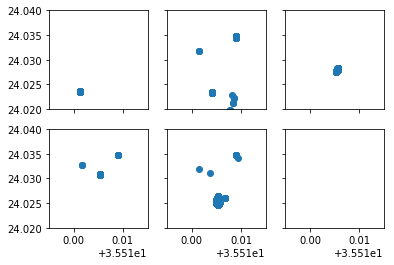

In [558]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, sharex='all', sharey='all')
plt.axis([35.505,35.525,24.02,24.04])
axes[0, 0].scatter(Chania[np.where(Chania[:,0] == 0)][:,3], Chania[np.where(Chania[:,0] == 0)][:,4])
axes[0, 1].scatter(Chania[np.where(Chania[:,0] == 1)][:,3], Chania[np.where(Chania[:,0] == 1)][:,4])
axes[0, 2].scatter(Chania[np.where(Chania[:,0] == 2)][:,3], Chania[np.where(Chania[:,0] == 2)][:,4])
axes[1, 0].scatter(Chania[np.where(Chania[:,0] == 3)][:,3], Chania[np.where(Chania[:,0] == 3)][:,4])
axes[1, 1].scatter(Chania[np.where(Chania[:,0] == 4)][:,3], Chania[np.where(Chania[:,0] == 4)][:,4])
plt.show()

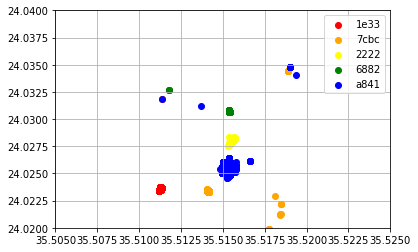

In [559]:
fig, ax = plt.subplots()
ax.scatter(Chania[np.where(Chania[:,0] == 0)][:,3], Chania[np.where(Chania[:,0] == 0)][:,4], c='red', label='1e33')
ax.scatter(Chania[np.where(Chania[:,0] == 1)][:,3], Chania[np.where(Chania[:,0] == 1)][:,4], c='orange', label='7cbc')
ax.scatter(Chania[np.where(Chania[:,0] == 2)][:,3], Chania[np.where(Chania[:,0] == 2)][:,4], c='yellow', label='2222')
ax.scatter(Chania[np.where(Chania[:,0] == 3)][:,3], Chania[np.where(Chania[:,0] == 3)][:,4], c='green', label='6882')
ax.scatter(Chania[np.where(Chania[:,0] == 4)][:,3], Chania[np.where(Chania[:,0] == 4)][:,4], c='blue', label='a841')


ax.legend()
ax.grid(True)

plt.axis([35.505,35.525,24.02,24.04])
plt.show()

In [592]:
print('1e33', len(Chania[np.where(Chania[:,0] == 0)]))
print('7cbc', len(Chania[np.where(Chania[:,0] == 1)]))
print('2222', len(Chania[np.where(Chania[:,0] == 2)]))
print('6882', len(Chania[np.where(Chania[:,0] == 3)]))
print('a841', len(Chania[np.where(Chania[:,0] == 4)]))

1e33 67051
7cbc 3676
2222 19161
6882 93818
a841 63468


In [564]:
data = Chania[:,1:6]

In [566]:
labels = Chania[:,0]

In [567]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [568]:
ntrain, ntest = 2000, 200
order = np.argsort(np.random.random(labels.shape))
train_data = data[order][0:ntrain]
train_labels = labels[order][0:ntrain]
test_data = data[order][ntrain:ntrain+ntest]
test_labels = labels[order][ntrain:ntrain+ntest]

In [573]:
test_data[0]

array([1.0000020944559969, 1.0, 1.0147247217142858, 1.0012806968055417,
       1.0], dtype=object)

In [572]:
train_data[:,0] = train_data[:,0]/734965
train_data[:,1] = train_data[:,1]/-79
train_data[:,2] = train_data[:,2]/35
train_data[:,3] = train_data[:,3]/24
train_data[:,4] = train_data[:,4]/60562

test_data[:,0] = test_data[:,0]/734965
test_data[:,1] = test_data[:,1]/-79
test_data[:,2] = test_data[:,2]/35
test_data[:,3] = test_data[:,3]/24
test_data[:,4] = test_data[:,4]/60562

In [574]:
model = keras.Sequential()
model.add(keras.layers.Dense(5, activation=tf.nn.relu))
model.add(keras.layers.Dense(5, activation=tf.nn.relu))
model.add(keras.layers.Dense(5, activation=tf.nn.softmax))
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=1000, verbose=0)
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(test_acc)

200/200 [==============================] - 8s 40ms/step
0.48


In [455]:
best_accuracy = 0
for numunits in [3, 5]:
    for epochs in [1000]:
        for numlayers in [2, 3]:
            print("Hidden Units:", numunits, "Epochs:", epochs, "Hidden Layers:", numlayers)
            model = keras.Sequential()
            for i in range(numlayers):
                model.add(keras.layers.Dense(numunits, activation=tf.nn.relu))
            model.add(keras.layers.Dense(5, activation=tf.nn.softmax))
            
            model.compile(optimizer=tf.train.AdamOptimizer(), 
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
            model.fit(train_data, train_labels, epochs, verbose=0)
            test_loss, test_acc = model.evaluate(test_data, test_labels)

            print('Test accuracy:', test_acc)
            if test_acc > best_accuracy:
                best_accuracy = test_acc
                print("BEST")
            print("")

Hidden Units: 3 Epochs: 1000 Hidden Layers: 2
100/100 [==============================] - 8s 76ms/step
Test accuracy: 0.31
BEST

Hidden Units: 3 Epochs: 1000 Hidden Layers: 3
100/100 [==============================] - 9s 87ms/step
Test accuracy: 0.2

Hidden Units: 5 Epochs: 1000 Hidden Layers: 2
100/100 [==============================] - 8s 80ms/step
Test accuracy: 0.1

Hidden Units: 5 Epochs: 1000 Hidden Layers: 3
100/100 [==============================] - 8s 80ms/step
Test accuracy: 0.1

